<a href="https://colab.research.google.com/github/Dk-Alpha/IBM-Data-Science-Course/blob/main/Part_2_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Objectives

After completing this lab you will be able to:

*   Handle missing values
*   Correct data format
*   Standardize and normalize data


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]

data=pd.read_csv("/content/drive/MyDrive/Machine learning/IBM DATA SCIENCE/Data Analytics with python/My Notebooks/imports-85.data", names=headers)
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [ ]:
data.replace("?",np.nan,inplace=True)

In [ ]:
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64



> Data Wrangling (handling ,missing values and formatting)



In [ ]:
avg_norm_loss = data["normalized-losses"].astype("float").mean(axis=0)
print("Average of normalized-losses:", avg_norm_loss)

Average of normalized-losses: 122.0


In [ ]:
data["normalized-losses"].replace(np.nan, avg_norm_loss, inplace=True)

In [ ]:
avg_bore=data['bore'].astype('float').mean(axis=0)
print("Average of bore:", avg_bore)

Average of bore: 3.3297512437810943


In [ ]:
data["bore"].replace(np.nan, avg_bore, inplace=True)

In [ ]:
data.stroke.info()
avg_stroke=data.stroke.astype('float').mean(axis=0)
print("Average of stroke:",avg_stroke)

<class 'pandas.core.series.Series'>
RangeIndex: 205 entries, 0 to 204
Series name: stroke
Non-Null Count  Dtype 
--------------  ----- 
201 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
Average of stroke: 3.255422885572139


In [ ]:
data.stroke=data.stroke.replace(np.nan,avg_stroke)

In [ ]:
avg_horsepower = data['horsepower'].astype('float').mean(axis=0)
print("Average horsepower:", avg_horsepower)

Average horsepower: 104.25615763546799


In [ ]:
data['horsepower'].replace(np.nan, avg_horsepower, inplace=True)

In [ ]:
avg_peakrpm=data['peak-rpm'].astype('float').mean(axis=0)
print("Average peak rpm:", avg_peakrpm)

Average peak rpm: 5125.369458128079


In [ ]:
data['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

In [ ]:
data['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [ ]:
data['num-of-doors'].value_counts().idxmax()

'four'

In [ ]:
#replace the missing 'num-of-doors' values by the most frequent 
data["num-of-doors"].replace(np.nan, "four", inplace=True)

In [ ]:
# # simply drop whole row with NaN in "price" column
# df.dropna(subset=["price"], axis=0, inplace=True)

# # or

data.price.dropna(axis=0,inplace=True)

> Standardization is the process of transforming data into a common format, allowing the researcher to make the meaningful comparison.

In [ ]:
# transform mpg to L/100km by mathematical operation (235 divided by mpg)   #standardization
data["highway-mpg"] = 235/data["highway-mpg"]

# rename column name from "highway-mpg" to "highway-L/100km"
data.rename(columns={'highway-mpg':'highway-L/100km'}, inplace=True)

# check your transformed data 
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-L/100km,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,8.703704,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,8.703704,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,9.038462,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,7.833333,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,10.681818,17450


> Normalization

Types of normalization: <br>
1. Simple Normalisation <br>
2. Z-score <br>
3. MinMAx<br>
4. Decimal<br>

In [ ]:
data.height=data.height/data.height.max()

<h2 id="binning">Binning</h2>
<b>Why binning?</b>
<p>
    Binning is a process of transforming continuous numerical variables into discrete categorical 'bins' for grouped analysis.
</p>

<b>Example: </b>

<p>In our dataset, "horsepower" is a real valued variable ranging from 48 to 288 and it has 59 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)? Can we rearrange them into three ‘bins' to simplify analysis? </p>

<p>We will use the pandas method 'cut' to segment the 'horsepower' column into 3 bins.</p>


In [ ]:
#converting the column to a proper format first and then binning will be applied
data["horsepower"]=data["horsepower"].astype(int, copy=True)

<Axes: xlabel='horsepower', ylabel='Count'>

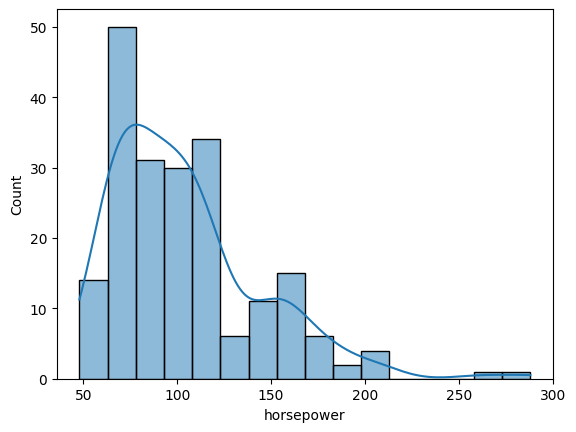

In [ ]:
#plotting histogtram
sns.histplot(data=data,x="horsepower",kde=True)

In [ ]:
bins = np.linspace(min(data["horsepower"]), max(data["horsepower"]), 4)
bins

array([ 48., 128., 208., 288.])

In [ ]:
group=["low","medium","high"]
data["horsepower_binned"]=pd.cut(data.horsepower,bins,labels=group,include_lowest=True)

In [ ]:
data[["horsepower","horsepower_binned"]].head()

,horsepower,horsepower_binned
0,111,low
1,111,low
2,154,medium
3,102,low
4,115,low


<Axes: xlabel='horsepower_binned', ylabel='Count'>

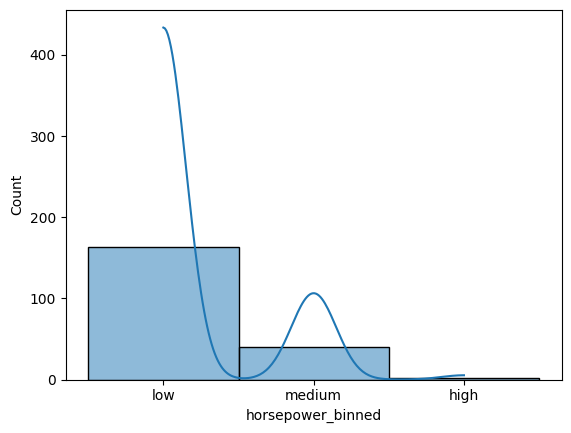

In [ ]:
#plotting histogtram
sns.histplot(data=data,x="horsepower_binned",kde=True)